In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model as ld
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv("C:/Users/Len/Downloads/songs.csv")

In [10]:
data.head()

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,...,track_artist_merged,lyrics,artist_name,tags,tags_tokenized,doc_vector,combined_vector,cluster,image_url,spotify_url
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,Kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,...,kygo,"['bring', 'me', 'higher', 'love,', 'love', '',...",Kygo,bring higher love love bring higher love think...,"['bring', 'higher', 'love', 'love', 'bring', '...",[-0.1148182 0.27755967 0.27891365 0.143460...,[-0.1148182 0.27755967 0.27891365 0.143460...,3,https://i.scdn.co/image/ab67616d0000b2737c8977...,https://open.spotify.com/track/6oJ6le65B3SEqPw...
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),Billieeilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,...,billie eilish,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'...",Billie Eilish,yeah yeah oh ah white shirt red bloody nose sl...,"['yeah', 'yeah', 'oh', 'ah', 'white', 'shirt',...",[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,1,https://i.scdn.co/image/ab67616d0000b273a69b8b...,https://open.spotify.com/track/3yNZ5r3LKfdmjoS...
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),Samfeldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,...,sam feldt,"['one', 'more', 'drink,', 'got', 'one', 'more'...",Sam Feldt,one drink got one bacardi one dance afterparty...,"['one', 'drink', 'got', 'one', 'bacardi', 'one...",[-0.1616459 0.21872164 0.3755187 0.116120...,[-0.1616459 0.21872164 0.37551871 0.116120...,3,https://i.scdn.co/image/ab67616d0000b27354de16...,https://open.spotify.com/track/0qc4QlcCxVTGySh...
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,Elliegoulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,...,ellie goulding,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'...",Ellie Goulding,sixteen sixteen remember moved mum said love s...,"['sixteen', 'sixteen', 'remember', 'moved', 'm...",[-0.17123666 0.15697554 0.2319686 0.190121...,[-0.17123666 0.15697554 0.2319686 0.190121...,3,https://i.scdn.co/image/ab67616d0000b27394181f...,https://open.spotify.com/track/4PkIDTPGedm0enz...
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,Katyperry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,...,katy perry,"[""i'm"", 'losing', 'my', 'self', 'control', '',...",Katy Perry,im losing self control yeah youre starting tri...,"['im', 'losing', 'self', 'control', 'yeah', 'y...",[-0.26988247 0.21529263 0.3686135 0.180054...,[-0.26988247 0.21529263 0.36861351 0.180054...,3,https://i.scdn.co/image/ab67616d0000b2739bea3b...,https://open.spotify.com/track/5PYQUBXc7NYeI1o...


In [11]:
data.columns

Index(['Unnamed: 0', 'track_id', 'track_name', 'track_artist',
       'track_popularity', 'track_album_release_date', 'playlist_genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'track_artist_merged', 'lyrics', 'artist_name', 'tags',
       'tags_tokenized', 'doc_vector', 'combined_vector', 'cluster',
       'image_url', 'spotify_url'],
      dtype='object')

In [12]:
data  = data[['Unnamed: 0', 'track_id', 'track_name', 'track_artist_merged',
       'track_popularity', 'track_album_release_date', 'playlist_genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms', 'lyrics']]

In [13]:
data.head()

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,0.680129,1.0,0.010572,0.015932,0.086004,0.391370,0.290605,228267,"['bring', 'me', 'higher', 'love,', 'love', '',..."
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),billie eilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,0.504094,1.0,0.326045,0.261120,0.102930,0.687634,0.508374,194840,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'..."
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),sam feldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,0.821136,1.0,0.118212,0.079871,0.090236,0.656505,0.314439,174444,"['one', 'more', 'drink,', 'got', 'one', 'more'..."
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,ellie goulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,0.753612,1.0,0.135031,0.277700,0.041997,0.538429,0.332383,201072,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'..."
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,katy perry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,0.781608,1.0,0.043969,0.201014,0.313445,0.370975,0.262872,223523,"[""i'm"", 'losing', 'my', 'self', 'control', '',..."


In [14]:
data['track_artist_merged']

0                     kygo
1            billie eilish
2                sam feldt
3           ellie goulding
4               katy perry
              ...         
895    diego & victor hugo
896     guilherme & benuto
897          ariana grande
898                  shaun
899            alan walker
Name: track_artist_merged, Length: 900, dtype: object

In [15]:
data = data.drop_duplicates()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                900 non-null    int64  
 1   track_id                  900 non-null    object 
 2   track_name                900 non-null    object 
 3   track_artist_merged       900 non-null    object 
 4   track_popularity          900 non-null    float64
 5   track_album_release_date  900 non-null    object 
 6   playlist_genre            900 non-null    object 
 7   danceability              900 non-null    float64
 8   energy                    900 non-null    float64
 9   key                       900 non-null    float64
 10  loudness                  900 non-null    float64
 11  mode                      900 non-null    float64
 12  speechiness               900 non-null    float64
 13  acousticness              900 non-null    float64
 14  liveness  

In [17]:
data.describe()

,Unnamed: 0,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,0.199545,0.623394,0.640775,0.484444,0.726726,0.574444,0.115008,0.225910,0.160050,0.518995,0.414709,211372.507778
std,259.951919,0.199525,0.183919,0.181130,0.334353,0.111564,0.494702,0.133004,0.238884,0.139023,0.237509,0.208335,45092.774311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104591.000000
25%,224.750000,0.045455,0.504248,0.527578,0.181818,0.681972,0.000000,0.023636,0.043808,0.077727,0.334210,0.245323,181819.500000
50%,449.500000,0.136364,0.652288,0.664127,0.454545,0.743644,1.000000,0.055262,0.140391,0.107691,0.515887,0.402658,206233.500000
75%,674.250000,0.318182,0.749346,0.777873,0.818182,0.798564,1.000000,0.158157,0.326666,0.194965,0.705882,0.543679,232736.750000
max,899.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,484147.000000


In [18]:
### correlation between fetures of song
floting_data = data[['danceability','energy','key',	'loudness',	'mode',	'speechiness',	'acousticness',	'liveness',	'valence',	'tempo',	'duration_ms']]
floting_data.corr(method='pearson')

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms
danceability,1.000000,0.031289,0.001076,0.109014,-0.106508,0.243252,-0.159556,-0.034687,0.346237,-0.129626,-0.239310
energy,0.031289,1.000000,0.011608,0.725461,-0.026359,-0.046044,-0.535016,0.138488,0.428159,0.101211,0.024129
key,0.001076,0.011608,1.000000,0.011471,-0.111290,0.048153,0.009219,0.037601,-0.015342,-0.037472,-0.000606
loudness,0.109014,0.725461,0.011471,1.000000,-0.005505,-0.062815,-0.407986,0.044840,0.351504,0.085810,-0.054462
mode,-0.106508,-0.026359,-0.111290,-0.005505,1.000000,-0.086526,0.044210,-0.018139,-0.040789,0.012290,0.041720
speechiness,0.243252,-0.046044,0.048153,-0.062815,-0.086526,1.000000,-0.028776,0.008562,0.051292,0.150525,-0.148040
acousticness,-0.159556,-0.535016,0.009219,-0.407986,0.044210,-0.028776,1.000000,-0.045979,-0.163880,-0.028704,0.004726
liveness,-0.034687,0.138488,0.037601,0.044840,-0.018139,0.008562,-0.045979,1.000000,0.054516,-0.012540,-0.009782
valence,0.346237,0.428159,-0.015342,0.351504,-0.040789,0.051292,-0.163880,0.054516,1.000000,0.044093,-0.084969
tempo,-0.129626,0.101211,-0.037472,0.085810,0.012290,0.150525,-0.028704,-0.012540,0.044093,1.000000,-0.010057


In [19]:
data.head()

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,0.680129,1.0,0.010572,0.015932,0.086004,0.391370,0.290605,228267,"['bring', 'me', 'higher', 'love,', 'love', '',..."
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),billie eilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,0.504094,1.0,0.326045,0.261120,0.102930,0.687634,0.508374,194840,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'..."
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),sam feldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,0.821136,1.0,0.118212,0.079871,0.090236,0.656505,0.314439,174444,"['one', 'more', 'drink,', 'got', 'one', 'more'..."
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,ellie goulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,0.753612,1.0,0.135031,0.277700,0.041997,0.538429,0.332383,201072,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'..."
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,katy perry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,0.781608,1.0,0.043969,0.201014,0.313445,0.370975,0.262872,223523,"[""i'm"", 'losing', 'my', 'self', 'control', '',..."


In [20]:
### convert column duration from ms to m


In [21]:
data['duration_ms'] = data['duration_ms']/60000

In [22]:
data.head()

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,0.680129,1.0,0.010572,0.015932,0.086004,0.391370,0.290605,3.804450,"['bring', 'me', 'higher', 'love,', 'love', '',..."
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),billie eilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,0.504094,1.0,0.326045,0.261120,0.102930,0.687634,0.508374,3.247333,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'..."
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),sam feldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,0.821136,1.0,0.118212,0.079871,0.090236,0.656505,0.314439,2.907400,"['one', 'more', 'drink,', 'got', 'one', 'more'..."
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,ellie goulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,0.753612,1.0,0.135031,0.277700,0.041997,0.538429,0.332383,3.351200,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'..."
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,katy perry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,0.781608,1.0,0.043969,0.201014,0.313445,0.370975,0.262872,3.725383,"[""i'm"", 'losing', 'my', 'self', 'control', '',..."


In [23]:
most_artist_in_playlist = data['track_artist_merged'].value_counts()[0:10]
most_artist_in_playlist

track_artist_merged
billie eilish            19
ariana grande            12
khalid                    8
calvin harris             8
the weeknd                7
red hot chili peppers     7
coldplay                  7
bad bunny                 7
juice wrld                7
bruno mars                7
Name: count, dtype: int64

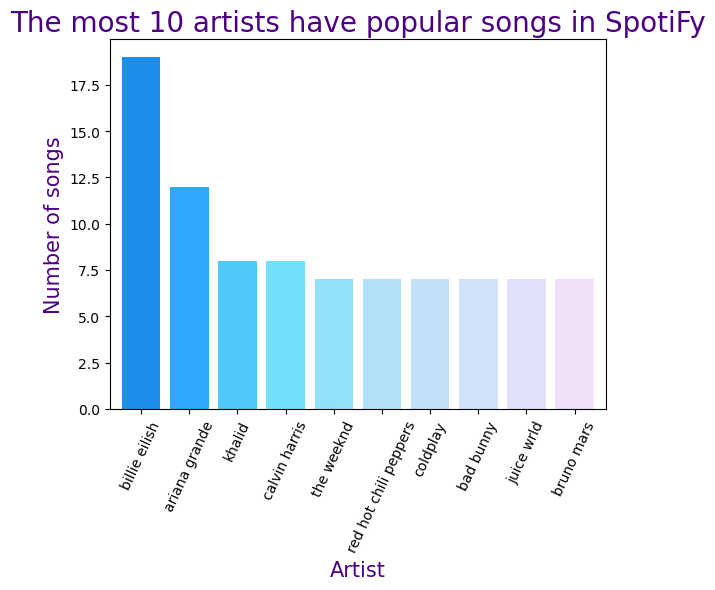

In [24]:
colors = ['#1D8FEA','#30A8F9' , '#50C8F9' ,'#70E1F9','#90E1F9','#B0E1F9','#C0E1F9','#D0E1F9','#E0E1F9','#F0E1F9' ]
most_artist_in_playlist = data['track_artist_merged'].value_counts()[0:10].plot(kind='bar' , color = colors ,  width=0.8) 
plt.title('The most 10 artists have popular songs in SpotiFy',fontsize = 20 , color = 'indigo')
plt.xlabel('Artist',fontsize = 15, color = 'indigo')
plt.xticks(rotation=65 , color ='black' )
plt.ylabel('Number of songs',fontsize = 15, color = 'indigo')
plt.show()


In [25]:
artist = data[['track_artist_merged','track_popularity']]

In [26]:
most_popularity =artist.groupby('track_artist_merged' , sort = True)['track_popularity'].sum().sort_values(ascending=False)

In [27]:
### 1. most  populiler artists in spotify ary them musics have population
most_popularity[0:10]

track_artist_merged
billie eilish    6.818182
travis scott     2.727273
ariana grande    2.590909
the weeknd       2.500000
juice wrld       2.500000
post malone      2.500000
dababy           2.409091
roddy ricch      2.181818
j balvin         2.136364
lewis capaldi    1.909091
Name: track_popularity, dtype: float64

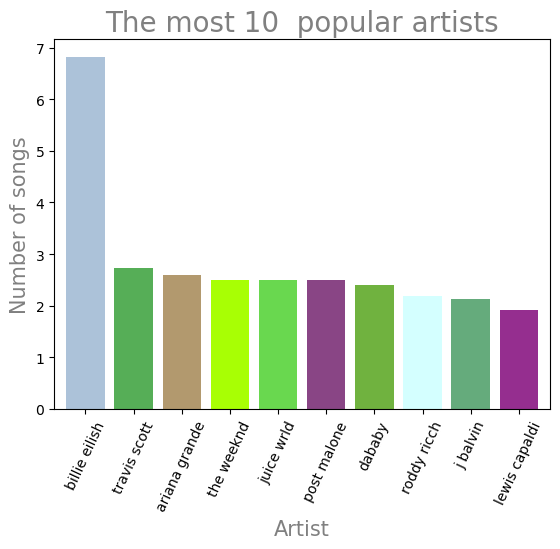

In [28]:
most_popular_artists = most_popularity[0:10].plot(kind='bar' , color = mcolors.XKCD_COLORS ,  width=0.8) 
plt.title('The most 10  popular artists',fontsize = 20 , color = 'gray')
plt.xlabel('Artist',fontsize = 15, color = 'gray')
plt.xticks(rotation=65 , color ='black' )
plt.ylabel('Number of songs',fontsize = 15, color = 'gray')
plt.show()

In [29]:
### 2. most kinds of music played in spotify
types_of_tracks = data["playlist_genre"].value_counts()

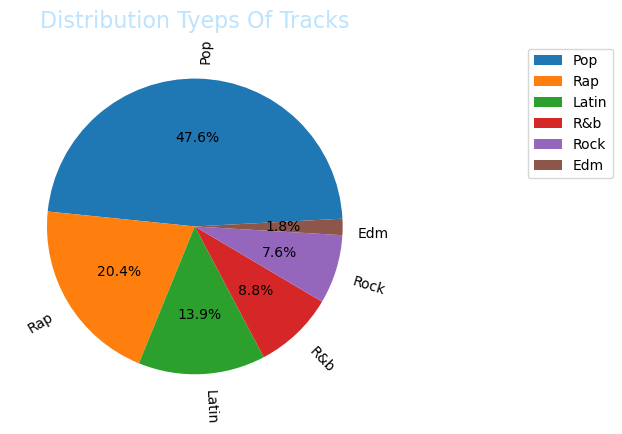

In [30]:
plt.pie( types_of_tracks, explode=None, labels= types_of_tracks.index,
        autopct='%1.1f%%',
        shadow=False, labeldistance=1.1, startangle=3,  textprops={'fontsize':10},  rotatelabels=True)
plt.title(
    label="Distribution Tyeps Of Tracks", 
    fontdict={"fontsize":16},
    pad=10,
    color = '#BDE3FE'

    
)
plt.legend(loc='best', bbox_to_anchor=(1.55, 0.9, 0.1, 0.1))

plt.show()

In [31]:
### 3. the most 3 songs in danceability
data.sort_values('danceability', ascending = False)[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
495,495,1GeNui6m825V8jP4uKiIaH,bad bad bad (feat. lil baby),young thug,0.227273,2019-08-16,Rap,1.000000,0.579354,0.545455,0.606002,1.0,0.192696,0.101115,0.138898,0.915200,0.346667,2.484000,"['wheezy', 'outta', 'here', '', '♪', '', 'rose..."
552,552,5MPPttjfGap2C6j6eKcO6J,baby (lil baby feat. dababy),quality control,0.136364,2019-08-16,Rap,0.994771,0.436635,0.909091,0.675841,1.0,0.411341,0.099146,0.138898,0.451481,0.318969,2.373617,"['wheezy', 'outta', 'here', '', 'yeah,', 'rest..."
548,548,6vN77lE9LK6HP2DewaN6HZ,yes indeed,lil baby,0.227273,2018-05-18,Rap,0.986928,0.311085,0.454545,0.587953,0.0,0.608361,0.036243,0.093409,0.560970,0.402672,2.371217,"['yeah', '', 'wheezy', 'outta', 'here', '', 't..."


In [32]:
### the least 3 songs in dancebility
data.sort_values(['danceability','track_popularity'])[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
374,374,7LVHVU3tWfcxj5aiPFEW4Q,fix you,coldplay,0.227273,2005-06-07,Pop,0.000000,0.388346,0.272727,0.612347,1.0,0.012254,0.168889,0.098699,0.089738,0.530849,4.925550,"['when', 'you', 'try', 'your', 'best,', 'but',..."
627,627,5wQnmLuC1W7ATsArWACrgW,welcome to the black parade,my chemical romance,0.090909,2006-10-23,Rock,0.010458,0.910935,0.181818,0.811147,1.0,0.061989,0.000272,0.214006,0.211035,0.241581,5.185117,"['when', 'i', 'was', 'a', 'young', 'boy', '', ..."
139,139,1j4kHkkpqZRBwE0A4CN4Yv,dusk till dawn - radio edit,zayn,0.227273,2017-09-07,Pop,0.064052,0.408735,1.000000,0.704394,0.0,0.018501,0.104639,0.091294,0.061507,0.823358,3.983333,"['not', 'tryna', 'be', 'indie,', 'not', 'tryna..."


In [33]:
### the most 3 songs in energy
data.sort_values('energy',ascending = False)[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
285,285,6nTiIhLmQ3FWhvrGafw2zj,american idiot,green day,0.090909,2004-09-21,Pop,0.223529,1.000000,0.090909,0.899507,1.0,0.048414,0.000000,0.368454,0.783169,0.865858,2.939100,"[""don't"", 'wanna', 'be', 'an', 'american', 'id..."
679,679,61mWefnWQOLf90gepjOCb3,duality,slipknot,0.000000,2004,Rock,0.189542,0.993562,0.363636,0.857320,0.0,0.173474,0.000218,0.194965,0.165951,0.569406,4.210217,"['i', 'push', 'my', 'fingers', 'into', 'my', '..."
803,803,2PpruBYCo4H7WOBJ7Q2EwM,hey ya!,outkast,0.090909,2003,Latin,0.678431,0.984977,0.363636,0.890118,0.0,0.051538,0.106711,0.164286,0.993559,0.119586,3.920217,"['one,', 'two,', 'three,', 'uh!', '', 'my', 'b..."


In [34]:
### the least 3 songs in energy
data.sort_values(['energy','track_popularity'])[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
846,846,0tMSssfxAL2oV8Vri0mFHE,listen before i go,billie eilish,0.227273,2019-03-29,R&b,0.143791,0.000000,0.000000,0.000000,1.0,0.025709,0.968911,0.389612,0.045728,0.121252,4.04420,"['take', 'me', 'to', 'the', 'rooftop', '', 'i'..."
838,838,4h0zU3O9R5xzuTmNO7dNDU,lost boy,ruth b.,0.000000,2015-08-21,R&b,0.654902,0.000429,0.636364,0.339721,1.0,0.035800,1.000000,0.073204,0.331258,0.430930,4.58800,"['there', 'was', 'a', 'time', 'when', 'i', 'wa..."
850,850,4CxFN5zON70B3VOPBYbd6P,you were good to me,jeremy zucker,0.272727,2019-05-03,R&b,0.460131,0.030797,0.181818,0.339721,1.0,0.020183,0.946113,0.097641,0.178832,0.277835,3.65245,"['lying,', ""isn't"", 'better', 'than', 'silence..."


In [35]:
### the most 3 songs in key
data.sort_values('key',ascending = False)[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
192,192,2xyx0o4xNOLLjBSbOOdcbA,playing games (with bryson tiller) - extended ...,summer walker,0.181818,2019-10-04,Pop,0.675817,0.377616,1.0,0.703837,0.0,0.045411,0.624860,0.217180,0.450408,0.374386,2.387117,"['whip,', 'bought', 'it', '', 'crib,', 'got', ..."
755,755,3H3r2nKWa3Yk5gt8xgmsEt,this city,sam fischer,0.000000,2019-12-13,Latin,0.513725,0.344350,1.0,0.720686,1.0,0.025228,0.757506,0.064636,0.513740,0.080034,3.247550,"[""i've"", 'been', 'seeing', 'lonely', 'people',..."
187,187,0rFQ5cKYJ9WtHSKp9sxVYt,heartless (feat. morgan wallen),diplo,0.272727,2019-08-16,Pop,0.725490,0.535358,1.0,0.712069,1.0,0.044210,0.284955,0.066328,0.231430,0.339980,2.820450,"['heartless', '(heartless,', 'heartless)', '',..."


In [36]:
### the least 3 songs in key
data.sort_values(['key','track_popularity'])[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
5,5,4Gcv5SsxnQWpmOnUI19EJk,all you need to know (feat. calle lehmann),gryffin,0.0,2019-03-27,Pop,0.397386,0.785385,0.0,0.788596,1.0,0.015377,0.010004,0.095525,0.208888,0.542905,3.974317,"['simple', 'as', 'can', 'be', '', 'i', 'got', ..."
140,140,5yVIlYEHZxQVLyInCdldoS,impossible,james arthur,0.0,2013-11-01,Pop,0.218301,0.686662,0.0,0.781908,0.0,0.085656,0.146091,0.095525,0.282954,0.749646,3.490667,"['i', 'remember', 'years', 'ago', '', 'someone..."
148,148,4T3fNx3CgwDRRYgmFCbD4J,better,khalid,0.0,2018-09-14,Pop,0.304575,0.567550,0.0,0.544094,0.0,0.087458,0.101944,0.127261,0.082224,0.245887,3.823550,"['(nothing', 'feels', 'better)', '', '(""i\'m',..."


In [37]:
### the most 3 songs in loudness
data.sort_values('loudness',ascending = False)[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
892,892,2kOmW169C7UV4SZDN9u0YO,vidrado em você,dj guuga,0.090909,2019-06-11,Edm,0.828758,0.932396,0.181818,1.000000,1.0,0.091422,0.144018,0.094467,0.591026,0.682509,2.246150,"['deixa', 'a', 'timidez', 'de', 'lado', '', 'p..."
605,605,6t94PGXYAuo9GbJEnMpPcW,la forma en que me miras,super yei,0.045455,2018-08-04,Rap,0.584314,0.650177,0.090909,0.927588,1.0,0.201105,0.154381,0.148418,0.572778,0.892954,5.123917,"['cuando', 'tú', 'me', 'miras', '', 'yo', 'sol..."
890,890,5n8Y78Pl5q8lqS7sJP61qw,relógio parado (ao vivo),diego & arnaldo,0.090909,2019-10-11,Edm,0.695425,0.951712,0.090909,0.926988,1.0,0.026430,0.050337,1.000000,0.735938,0.437861,3.012267,"['ela', 'não', 'sabe', 'ainda', '', 'mas', 'eu..."


In [38]:
### the least 3 songs in loudness
data.sort_values(['loudness','track_popularity'])[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
846,846,0tMSssfxAL2oV8Vri0mFHE,listen before i go,billie eilish,0.227273,2019-03-29,R&b,0.143791,0.000000,0.000000,0.000000,1.0,0.025709,0.968911,0.389612,0.045728,0.121252,4.044200,"['take', 'me', 'to', 'the', 'rooftop', '', 'i'..."
646,646,5ihS6UUlyQAfmp48eSkxuQ,landslide,fleetwood mac,0.045455,1975-07-11,Rock,0.267974,0.112566,0.636364,0.030139,0.0,0.009851,0.915024,0.102930,0.411765,0.678651,3.324883,"['i', 'took', 'my', 'love,', 'i', 'took', 'it'..."
753,753,58wyJLv6yH1La9NIZPl3ne,can we kiss forever?,kina,0.409091,2018-08-31,Latin,0.409150,0.077154,0.363636,0.184609,1.0,0.014536,0.926423,0.078705,0.090812,0.332853,3.132200,"['i', 'tried', 'to', 'reach', 'you,', 'i', ""ca..."


In [39]:
### the most 3 songs in speechiness	
data.sort_values('speechiness',ascending = False)[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
490,490,5lw8Mgb4LyhriPIC86gV6e,rnp (feat. anderson .paak),ybn cordae,0.090909,2019-07-26,Rap,0.525490,0.705977,0.818182,0.785723,0.0,1.000000,0.190651,0.132551,0.631816,0.935383,2.930467,"['one', 'of', ""y'all"", '–', ""gon'"", 'be', '–',..."
547,547,4dAMdQ6g4kGmnc1MDHsg77,shotta flow,nle choppa,0.000000,2019-01-17,Rap,0.887582,0.401223,0.818182,0.698607,1.0,0.678039,0.081426,0.118798,0.440747,0.403582,2.666883,"['i', 'wish', 'everything', 'i', 'touch', 'wou..."
561,561,2yuYI5NFhevxa05se7Qht9,ansia no,fsk satellite,0.000000,2019-12-05,Rap,0.802614,0.667346,0.090909,0.701350,1.0,0.644402,0.158526,0.209775,0.715543,0.683958,2.475000,"['greg', 'willen', 'non', 'dormire', '', 'ansi..."


In [40]:
### the least 3 songs in speechiness	
data.sort_values(['speechiness','track_popularity'])[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
662,662,7vFv0yFGMJW3qVXbAd9BK9,your body is a wonderland,john mayer,0.045455,2001-08-16,Rock,0.572549,0.722073,0.454545,0.719057,1.0,0.000000,0.021320,0.120914,0.695148,0.220996,4.16045,"['we', 'got', 'the', 'afternoon', '', 'you', '..."
389,389,75JFxkI2RXiU7L9VXzMkle,the scientist,coldplay,0.318182,2002-08-08,Pop,0.458824,0.414100,0.454545,0.677342,1.0,0.000841,0.753361,0.095525,0.185273,0.588142,5.16000,"['come', 'up', 'to', 'meet', 'you,', 'tell', '..."
218,218,04ZTP5KsCypmtCmQg5tH9R,i'm a mess,bebe rexha,0.181818,2018-06-22,Pop,0.550327,0.684516,1.000000,0.718800,0.0,0.002042,0.002885,0.055221,0.189566,0.241966,3.25865,"[""everything's"", 'been', 'so', 'messed', 'up',..."


In [41]:
### the most 3 songs in acousticness
data.sort_values('acousticness',ascending = False)[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
838,838,4h0zU3O9R5xzuTmNO7dNDU,lost boy,ruth b.,0.000000,2015-08-21,R&b,0.654902,0.000429,0.636364,0.339721,1.0,0.035800,1.000000,0.073204,0.331258,0.430930,4.588000,"['there', 'was', 'a', 'time', 'when', 'i', 'wa..."
826,826,6CcJMwBtXByIz4zQLzFkKc,i love you,billie eilish,0.409091,2019-03-29,R&b,0.277124,0.080373,0.000000,0.196699,1.0,0.017540,0.986528,0.094467,0.086518,0.525114,4.863267,"[""it's"", 'not', 'true', '', 'tell', 'me', ""i'v..."
185,185,4Of7rzpRpV1mWRbhp5rAqG,bruises,lewis capaldi,0.454545,2019-05-17,Pop,0.688889,0.270308,0.363636,0.651361,1.0,0.052979,0.980310,0.175923,0.345213,0.341366,3.674867,"['counting', 'days,', 'counting', 'days', '', ..."


In [42]:
### the least 3 songs in acousticness
data.sort_values(['acousticness','track_popularity'])[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
285,285,6nTiIhLmQ3FWhvrGafw2zj,american idiot,green day,0.090909,2004-09-21,Pop,0.223529,1.000000,0.090909,0.899507,1.0,0.048414,0.000000,0.368454,0.783169,0.865858,2.939100,"[""don't"", 'wanna', 'be', 'an', 'american', 'id..."
638,638,5UWwZ5lm5PKu6eKsHAGxOk,everlong,foo fighters,0.045455,1997-05-20,Rock,0.265359,0.886254,1.000000,0.749539,0.0,0.015978,0.000034,0.064318,0.339845,0.669486,4.175783,"['hello', '', ""i've"", 'waited', 'here', 'for',..."
676,676,5mpUKTdskZea0gStWzeHUZ,unsainted,slipknot,0.045455,2019-08-09,Rock,0.284967,0.954931,0.636364,0.893248,1.0,0.027991,0.000095,0.043055,0.212108,0.272072,4.346217,"['oh,', ""i'll"", 'never', 'kill', 'myself', 'to..."


In [43]:
### the most 3 songs in liveness
data.sort_values('liveness',ascending = False)[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
890,890,5n8Y78Pl5q8lqS7sJP61qw,relógio parado (ao vivo),diego & arnaldo,0.090909,2019-10-11,Edm,0.695425,0.951712,0.090909,0.926988,1.0,0.026430,0.050337,1.000000,0.735938,0.437861,3.012267,"['ela', 'não', 'sabe', 'ainda', '', 'mas', 'eu..."
889,889,3tv697PZNnaQN0Mn2zGhS5,a gente fez amor - ao vivo,gusttavo lima,0.363636,2019-12-05,Edm,0.763399,0.945273,0.727273,0.882444,0.0,0.012013,0.379258,0.996826,0.845427,0.501071,3.958617,"['una', 'bachata!', 'ah!', '', '♪', '', 'a', '..."
891,891,4k20Ie47EcWtS4wMBn8w8S,invocada (participação especial de léo santana...,ludmilla,0.181818,2019-05-31,Edm,0.741176,0.866939,0.090909,0.803516,1.0,0.033758,0.495323,0.965090,0.710176,0.507933,2.624900,"['eu', 'te', 'amava,', 'não', 'posso', 'negar'..."


In [44]:
### the least 3 songs in liveness
data.sort_values(['liveness','track_popularity'])[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
709,709,2bPtwnrpFNEe8N7Q85kLHw,combatchy (feat. mc rebecca),anitta,0.409091,2019-11-20,Latin,0.806536,0.723146,0.090909,0.857063,1.0,0.068837,0.396875,0.000000,0.607128,0.613950,2.626667,"['vai', 'começar', 'o', 'combate', '', 'hey,',..."
865,865,3Vo4wInECJQuz9BIBMOu8i,finesse - remix; feat. cardi b,bruno mars,0.045455,2017-12-20,R&b,0.647059,0.861573,0.454545,0.777964,0.0,0.091302,0.019144,0.001904,0.951696,0.298748,3.621483,"['drop', 'top', 'porsche', '(porsche),', 'roll..."
342,342,1gv4xPanImH17bKZ9rOveR,raise your glass,p!nk,0.000000,2010-10-05,Pop,0.641830,0.700612,0.636364,0.772433,1.0,0.072441,0.004947,0.009732,0.628596,0.417102,3.382667,"['right,', 'right,', 'turn', 'off', 'the', 'li..."


In [45]:
### the most 3 songs in valence	
data.sort_values('valence',ascending = False)[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
639,639,7HKez549fwJQDzx3zLjHKC,start me up - remastered,the rolling stones,0.000000,1981-08-24,Rock,0.551634,0.939908,0.454545,0.809475,1.0,0.014176,0.045155,0.076272,1.000000,0.419973,3.551117,"['if', 'you', 'start', 'me', 'up', '', 'if', '..."
127,127,7w87IxuO7BDcJ3YUqCyMTT,pumped up kicks,foster the people,0.318182,2011-05-23,Pop,0.684967,0.701685,0.454545,0.736292,0.0,0.006728,0.150236,0.080292,0.993559,0.458803,3.993333,"[""robert's"", 'got', 'a', 'quick', 'hand', '', ..."
803,803,2PpruBYCo4H7WOBJ7Q2EwM,hey ya!,outkast,0.090909,2003,Latin,0.678431,0.984977,0.363636,0.890118,0.0,0.051538,0.106711,0.164286,0.993559,0.119586,3.920217,"['one,', 'two,', 'three,', 'uh!', '', 'my', 'b..."


In [46]:
### the least 3 songs in valence	
data.sort_values(['valence','track_popularity'])[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
829,829,1WsEgieHsWWndAzLkmV105,hostage,billie eilish,0.136364,2017-12-22,R&b,0.284967,0.071789,0.818182,0.334191,0.0,0.031355,0.899479,0.056596,0.000000,0.469935,3.823767,"['i', 'wanna', 'be', 'alone', '', 'alone', 'wi..."
827,827,4QIo4oxwzzafcBWkKjDpXY,xanny,billie eilish,0.318182,2019-03-29,R&b,0.407843,0.073935,0.818182,0.222551,1.0,0.258770,0.778232,0.259494,0.014384,0.343831,4.062083,"['what', 'is', 'it', 'about', 'them?', '', 'i'..."
513,513,7wBJfHzpfI3032CSD7CE2m,stargazing,travis scott,0.181818,2018-08-03,Rap,0.363399,0.786458,0.727273,0.828853,1.0,0.024507,0.009786,0.179097,0.018248,0.613061,4.511917,"[""rollin',"", ""rollin',"", ""rollin',"", 'got', 'm..."


In [47]:
### the most 3 songs in tempo	
data.sort_values('tempo',ascending = False)[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
105,105,3i9UVldZOE0aD0JnyfAZZ0,lover (remix) [feat. shawn mendes],taylor swift,0.409091,2019-11-13,Pop,0.312418,0.586866,0.636364,0.679400,1.0,0.048534,0.448690,0.070348,0.410691,1.000000,3.688450,"['we', 'could', 'leave', 'the', 'christmas', '..."
796,796,79JBjIq90BrQ8Ws0pUhlzD,mad love,mabel,0.045455,2019-06-07,Latin,0.539869,0.793969,0.000000,0.858478,0.0,0.178280,0.691183,0.091294,0.623229,0.947019,2.830217,"['boy,', 'you', ""lookin'"", 'like', 'my', 'type..."
490,490,5lw8Mgb4LyhriPIC86gV6e,rnp (feat. anderson .paak),ybn cordae,0.090909,2019-07-26,Rap,0.525490,0.705977,0.818182,0.785723,0.0,1.000000,0.190651,0.132551,0.631816,0.935383,2.930467,"['one', 'of', ""y'all"", '–', ""gon'"", 'be', '–',..."


In [48]:
### the least 3 songs in tempo	
data.sort_values(['tempo','track_popularity'])[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
825,825,6X29iaaazwho3ab7GNue5r,8,billie eilish,0.181818,2019-03-29,R&b,0.687582,0.191973,0.272727,0.419464,1.0,0.350072,0.723308,0.092352,0.453628,0.000000,2.886700,"['wait', 'a', 'minute,', 'let', 'me', 'finish'..."
325,325,39LmTF9RgyakzSYX8txrow,imagine,ariana grande,0.000000,2019-02-08,Pop,0.679739,0.449512,0.727273,0.773333,1.0,0.015377,0.391693,0.106104,0.355947,0.000518,3.537783,"['step', 'up', 'the', 'two', 'of', 'us,', 'nob..."
613,613,1lCRw5FEZ1gPDNPzy1K4zW,we are the champions - remastered 2011,queen,0.000000,1977-10-28,Rock,0.077124,0.432343,0.909091,0.689518,1.0,0.013215,0.391693,0.103988,0.145556,0.012120,2.986667,"[""i've"", 'paid', 'my', 'dues', '', 'time', 'af..."


In [49]:
### the most 3 songs in duration	
data.sort_values('duration_ms',ascending = False)[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
147,147,4rHZZAmHpZrA3iH5zx8frV,mirrors,justin timberlake,0.045455,2013-03-15,Pop,0.477124,0.489216,0.454545,0.701350,0.0,0.032076,0.242466,0.079234,0.507299,0.101193,8.069117,"[""aren't"", 'you', ""somethin'"", 'to', 'admire?'..."
641,641,5CQ30WqJwcep0pYcV4AMNc,stairway to heaven - remaster,led zeppelin,0.090909,1971-11-08,Rock,0.168627,0.304646,0.818182,0.470482,0.0,0.012374,0.601025,0.101872,0.169171,0.139940,8.047167,"[""there's"", 'a', 'lady', ""who's"", 'sure,', 'al..."
797,797,1aUGxXCz9QimNkKeiJtzZ7,105 f remix,kevvo,0.227273,2019-09-12,Latin,0.903268,0.748900,0.454545,0.686259,0.0,0.159058,0.381330,0.281710,0.753113,0.263250,7.736667,"['desde', 'que', 'yo', 'entré,', 'rápido', 'te..."


In [50]:
### the least 3 songs in duration	
data.sort_values(['duration_ms','track_popularity'])[0:3]

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
157,157,2QpGZOhTCHHiKmpSO9FW4h,follow god,kanye west,0.409091,2019-10-25,Pop,0.418301,0.905569,0.090909,0.836870,1.0,0.473811,0.000230,0.024225,0.423572,0.825095,1.743183,"['father', 'i', 'stretch', '', 'stretch', 'my'..."
423,423,39oeKRgsLeynDIbWuXyA47,can't get over you (feat. clams casino),joji,0.000000,2018-10-26,Pop,0.903268,0.278893,0.818182,0.609904,1.0,0.370495,0.708800,0.069396,0.863675,0.472379,1.784617,"['i', ""can't"", 'get', 'over', 'you', '', ""can'..."
171,171,1000nHvUdawXuUHgBod4Wv,panini,lil nas x,0.136364,2019-09-13,Pop,0.645752,0.577208,0.454545,0.723558,0.0,0.061989,0.354386,0.109277,0.467583,0.639954,1.914883,"['day-day-daytrip', 'took', 'it', 'to', 'ten',..."


In [51]:
### the oldest 3 songs 	
data[['track_name','track_album_release_date']].sort_values('track_album_release_date')[0:3]

,track_name,track_album_release_date
620,(i can't get no) satisfaction - mono version,1965-07-30
534,brown eyed girl,1967-09
619,all along the watchtower,1968-10-25


In [52]:
### the latest 3 songs 	
data[['track_name','track_album_release_date']].sort_values('track_album_release_date' , ascending = False)[0:3]

,track_name,track_album_release_date
869,those kinda nights (feat. ed sheeran),2020-01-17
90,godzilla (feat. juice wrld),2020-01-17
708,me gusta,2020-01-13


In [53]:
###  the most kind of tracks for  each artist
most_kind_of_tracks_for_each_artist = data.groupby(['track_artist_merged','playlist_genre'])['playlist_genre'].count().sort_values(ascending = False)

In [54]:
 most_kind_of_tracks_for_each_artist

track_artist_merged  playlist_genre
billie eilish        R&b               11
ariana grande        Pop               10
calvin harris        Pop                8
billie eilish        Pop                8
martin garrix        Pop                7
                                       ..
j balvin             Latin              1
imagine dragons      Pop                1
hozier               Pop                1
hippie sabotage      Pop                1
zion & lennox        Latin              1
Name: playlist_genre, Length: 581, dtype: int64

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(floting_data)

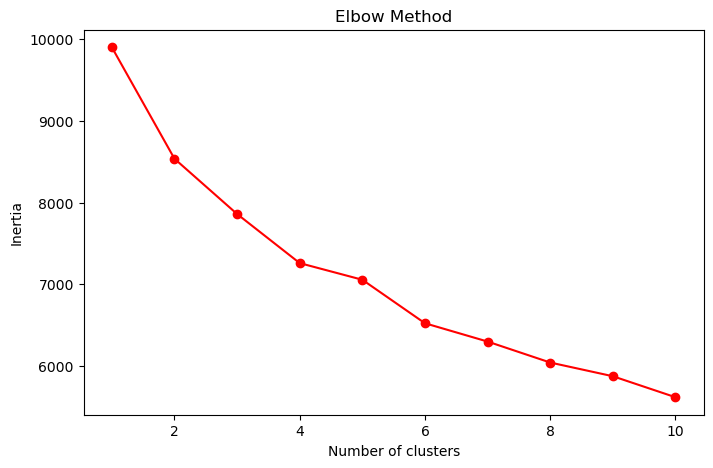

In [56]:
# Determine optimal number of clusters (K) using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to decide on the best 'K'
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', color = 'r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

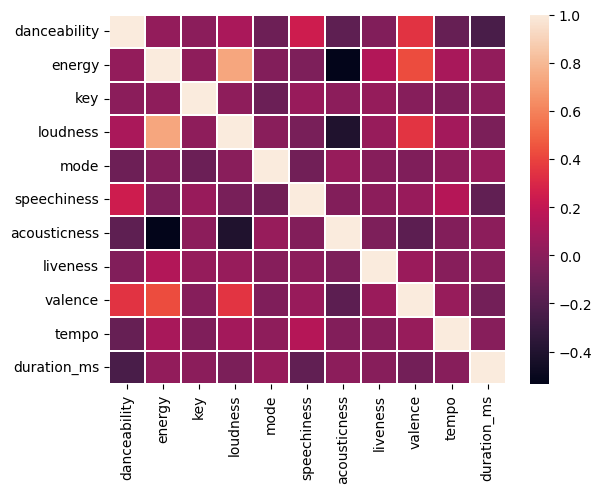

In [57]:
### heat map of correlations between numerical columns 
ax = sns.heatmap(floting_data.corr(), linewidth=1.2)
plt.show()

##
Using machine learning 

In [ ]:
x = floting_data['energy']
y = floting_data['loudness']

Text(0, 0.5, 'loudness')

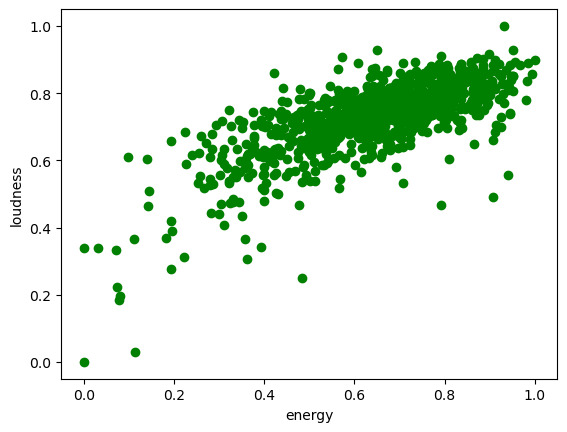

In [125]:
plt.scatter(x,y,color = 'g')
plt.xlabel('energy')
plt.ylabel('loudness')

In [126]:
msk=np.random.rand(len(data))<0.8
train=data[msk]
test=data[~msk]

In [127]:
train_x = np.asanyarray(train[['energy']])
train_y = np.asanyarray(train[['loudness']])
test_x = np.asanyarray(test[['energy']])
test_y = np.asanyarray(test[['loudness']])


In [128]:
regr = ld.LinearRegression()
regr.fit(train_x,train_y)


LinearRegression()

In [129]:
print("coef : ",regr.coef_)
print("intercept : ",regr.intercept_)

coef :  [[0.45060912]]
intercept :  [0.43803371]


In [130]:
y_hat = regr.predict(test_x)

In [131]:
print(y_hat)

[[0.73874603]
 [0.75180156]
 [0.7116679 ]
 [0.67201778]
 [0.76534062]
 [0.75712047]
 [0.82771703]
 [0.75712047]
 [0.83255241]
 [0.82578288]
 [0.77887969]
 [0.66186348]
 [0.76437355]
 [0.85237747]
 [0.73391065]
 [0.63720304]
 [0.7967706 ]
 [0.76485708]
 [0.77114308]
 [0.80305659]
 [0.77404431]
 [0.77452784]
 [0.77259369]
 [0.80160598]
 [0.81514504]
 [0.67201778]
 [0.83883841]
 [0.79580352]
 [0.77356077]
 [0.83690425]
 [0.70248067]
 [0.68894161]
 [0.7053819 ]
 [0.79145168]
 [0.62269689]
 [0.53856127]
 [0.75518632]
 [0.62221336]
 [0.81562858]
 [0.62898289]
 [0.68362269]
 [0.61737798]
 [0.681205  ]
 [0.69280991]
 [0.55983695]
 [0.62753227]
 [0.77501138]
 [0.54001189]
 [0.61786151]
 [0.6671824 ]
 [0.74648264]
 [0.62511458]
 [0.63526888]
 [0.65799517]
 [0.79822121]
 [0.80692489]
 [0.65751163]
 [0.67588608]
 [0.80547428]
 [0.6164109 ]
 [0.81176028]
 [0.82965118]
 [0.66283055]
 [0.84705855]
 [0.79241875]
 [0.82674996]
 [0.69039222]
 [0.59561876]
 [0.8615647 ]
 [0.84077256]
 [0.72520696]
 [0.85

In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [133]:
mse =  mean_squared_error(test_y , y_hat)
mse

0.006270209481026409

In [156]:
R2 = r2_score(test_y , y_hat)
print('Y =',regr.intercept_[0],'+',regr.coef_[0][0],'X')
print(R2*100,"%")

Y = 0.4380337098287063 + 0.4506091167235831 X
48.60811975858789 %


Text(0, 0.5, 'Loudness')

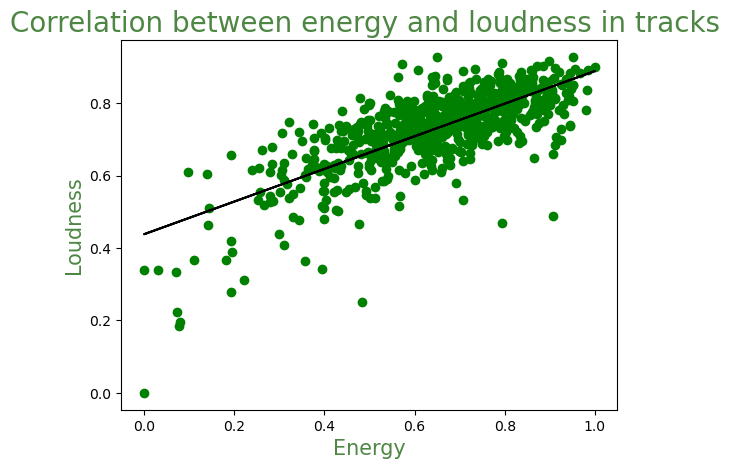

In [157]:
plt.scatter(train_x,train_y, color='g')
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0] , color = 'black')
plt.title("Correlation between energy and loudness in tracks " , color = '#4D8743', fontsize = 20)
plt.xlabel('Energy', color = '#4D8743' , fontsize = 15)
plt.ylabel('Loudness', color = '#4D8743', fontsize = 15)

In [158]:
### compare Fetures of  the most 5 populer tracks
data.head()

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,0.680129,1.0,0.010572,0.015932,0.086004,0.391370,0.290605,3.804450,"['bring', 'me', 'higher', 'love,', 'love', '',..."
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),billie eilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,0.504094,1.0,0.326045,0.261120,0.102930,0.687634,0.508374,3.247333,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'..."
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),sam feldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,0.821136,1.0,0.118212,0.079871,0.090236,0.656505,0.314439,2.907400,"['one', 'more', 'drink,', 'got', 'one', 'more'..."
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,ellie goulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,0.753612,1.0,0.135031,0.277700,0.041997,0.538429,0.332383,3.351200,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'..."
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,katy perry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,0.781608,1.0,0.043969,0.201014,0.313445,0.370975,0.262872,3.725383,"[""i'm"", 'losing', 'my', 'self', 'control', '',..."


In [159]:
 best_5_music = data.sort_values('track_popularity', ascending = False)[0:5]
 best_5_music

,Unnamed: 0,track_id,track_name,track_artist_merged,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,lyrics
429,429,0nbXyq5TXYPCO7pr3N8S4I,the box,roddy ricch,1.000000,2019-12-06,Rap,0.898039,0.568623,0.909091,0.700364,0.0,0.038803,0.107748,0.814874,0.646844,0.381758,3.277550,"[""pullin'"", 'out', 'the', 'coupe', 'at', 'the'..."
95,95,2b8fOow8UzyDFAE27YhOZM,memories,maroon 5,1.000000,2019-09-20,Pop,0.725490,0.283185,1.000000,0.677985,1.0,0.037242,0.867354,0.066117,0.574925,0.200055,3.158100,"[""here's"", 'to', 'the', 'ones', 'that', 'we', ..."
96,96,0sf12qNH5qcw8qpgymFOqD,blinding lights,the weeknd,1.000000,2019-11-29,Pop,0.397386,0.793969,0.090909,0.812347,1.0,0.047213,0.001496,0.078388,0.328038,0.760163,3.359550,"['yeah', '', '♪', '', ""i've"", 'been', 'tryna',..."
77,77,7k4t7uLgtOxPwTpFmtJNTY,tusa,karol g,1.000000,2019-11-07,Pop,0.776471,0.707050,0.181818,0.846431,1.0,0.329649,0.305680,0.039882,0.573851,0.270532,3.349333,"['¿qué', 'pasó', 'contigo?', '', 'dímelo,', 'r..."
388,388,4TnjEaWOeW0eKTKIEvJyCa,falling,trevor daniel,0.954545,2018-10-05,Pop,0.751634,0.401223,0.909091,0.611661,0.0,0.015377,0.127437,0.072993,0.211035,0.452586,2.656367,"['my', 'last', 'made', 'me', 'feel', 'like', '..."


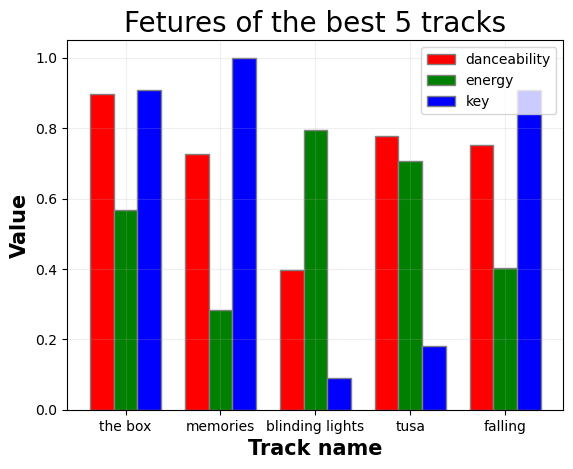

In [160]:
Width = 0.25
bar1 = np.arange(len(best_5_music['danceability'])) 
bar2 = [x + Width for x in bar1] 
bar3 = [x + Width for x in bar2] 
bar4 = [x + Width for x in bar3] 
bar5 = [x + Width for x in bar4] 
bar6 = [x + Width for x in bar5] 
bar7 = [x + Width for x in bar6] 
bar8 = [x + Width for x in bar7]
bar9 = [x + Width for x in bar8] 
bar10 = [x +Width for x in bar9] 
plt.bar(bar1,best_5_music['danceability'] , color ='r', width = width, 
        edgecolor ='grey', label ='danceability') 
plt.bar(bar2, best_5_music['energy'], color ='g', width =width, 
        edgecolor ='grey', label ='energy') 
plt.bar(bar3, best_5_music['key'], color ='b', width = width, 
        edgecolor ='grey', label ='key') 


plt.xlabel('Track name', fontweight ='bold', fontsize = 15) 
plt.ylabel('Value', fontweight ='bold', fontsize = 15) 
plt.xticks([r + width for r in range(len(best_5_music['danceability']))],
    best_5_music['track_name'])
plt.title("Fetures of the best 5 tracks",fontsize = 20)
plt.grid(alpha= 0.2)
plt.legend()
plt.show()

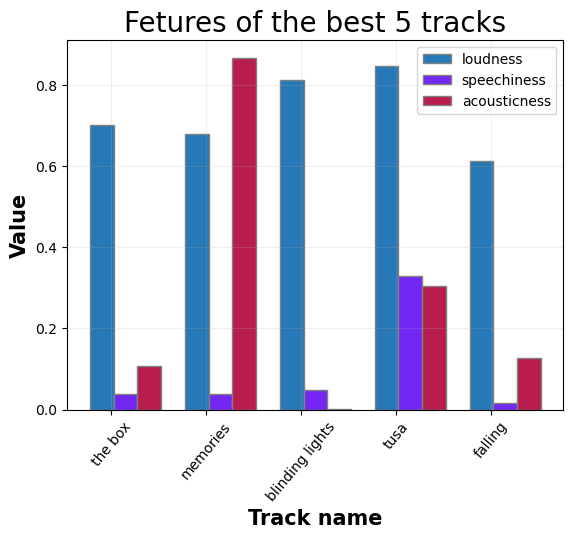

In [161]:
plt.bar(bar4, best_5_music['loudness'], color ='#2679B6', width = width, 
        edgecolor ='grey', label ='loudness') 
plt.bar(bar5, best_5_music['speechiness'], color ='#7426F3', width = width, 
        edgecolor ='grey', label ='speechiness') 
plt.bar(bar6, best_5_music['acousticness'], color ='#B81D4E', width = width, 
        edgecolor ='grey', label ='acousticness') 
plt.xlabel('Track name', fontweight ='bold', fontsize = 15) 
plt.ylabel('Value', fontweight ='bold', fontsize = 15) 
plt.xticks([r + width+0.6 for r in range(len(best_5_music['danceability']))],
    best_5_music['track_name'], rotation = 50)
plt.title("Fetures of the best 5 tracks",fontsize = 20)
plt.legend()
plt.grid(alpha = 0.2)
plt.show()

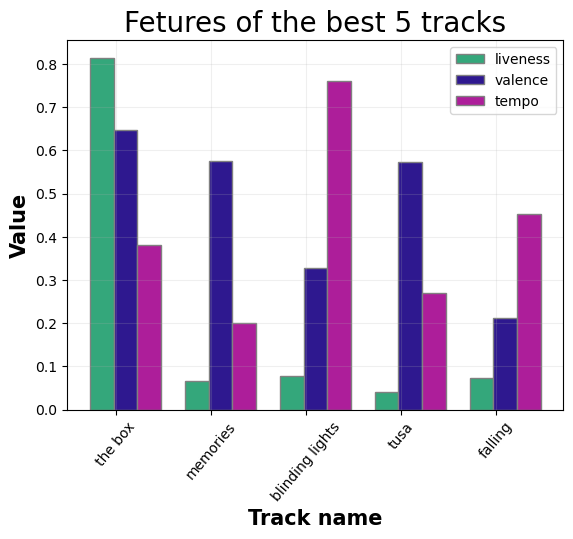

In [162]:
plt.bar(bar7, best_5_music['liveness'], color ='#34A77B', width = width, 
        edgecolor ='grey', label ='liveness')
plt.bar(bar8, best_5_music['valence'], color ='#2E188F', width = width, 
        edgecolor ='grey', label ='valence')
plt.bar(bar9, best_5_music['tempo'], color ='#AD1E9A', width = width, 
        edgecolor ='grey', label ='tempo')
plt.xlabel('Track name', fontweight ='bold', fontsize = 15) 
plt.ylabel('Value', fontweight ='bold', fontsize = 15) 
plt.xticks([r + width+1.4 for r in range(len(best_5_music['danceability']))],
    best_5_music['track_name'], rotation = 50)
plt.title("Fetures of the best 5 tracks",fontsize = 20)
plt.grid(alpha= 0.2)
plt.legend()
plt.show()

Text(0.5, 1.0, 'The Distrbution Of Time Of Tracks')

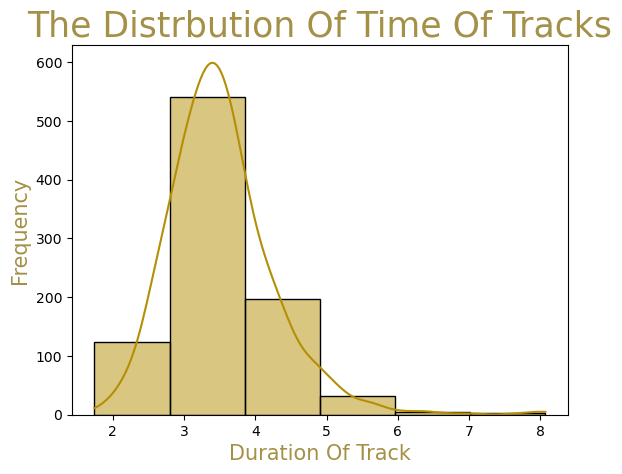

In [163]:
### distrbution of time of tracks
sns.histplot(data['duration_ms'], bins=6, color='#B48E05', edgecolor='black',kde=True)
 
# Adding labels and title
plt.xlabel('Duration Of Track',fontsize = 15 , color = '#A49047')
plt.ylabel('Frequency',fontsize = 15 , color = '#A49047')
plt.title('The Distrbution Of Time Of Tracks' , fontsize = 25 , color = '#A49047')

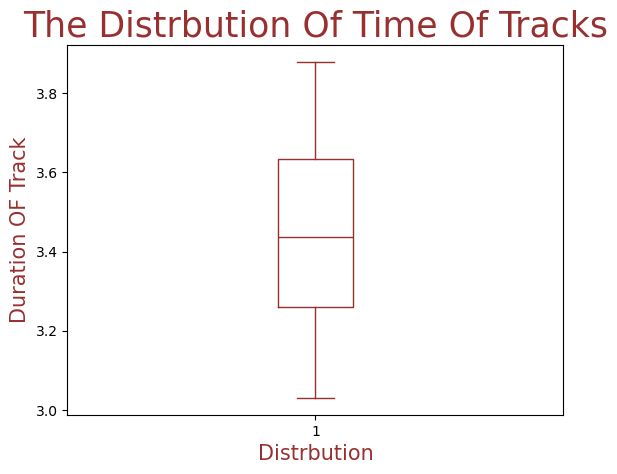

In [164]:
### make  distrbution for time of tracks by using boxplot
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['duration_ms'].quantile(0.25)
Q3 = data['duration_ms'].quantile(0.75)
# Identify outliers
outliers= data[~((data['duration_ms'] <Q1) | (data['duration_ms'] > Q3))]

box1 = plt.boxplot(outliers['duration_ms'])
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:  
  plt.setp(box1[item], color='#993030')
plt.xlabel("Distrbution", fontsize = 15 , color = '#993030')
plt.ylabel("Duration OF Track", fontsize = 15 , color = '#993030')
plt.title("The Distrbution Of Time Of Tracks", fontsize = 25 , color = '#993030')
# show plot
plt.show()

In [78]:
#######################################################################################################################